# Feature Scaling - Standardization

Feature Scaling is a method to standardize the features present in the data in a fixed range. It has to perform during the data pre-processing.

There are two types of Feature Scaling:
1. Standardization
2. Normalization

Standardization, also known as z-score normalization, is a statistical process that involves transforming a dataset so that it has a mean of zero and a standard deviation of one. This process is often used in data analysis to make different datasets more comparable and to allow for easier comparison between data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(2)

,Age,EstimatedSalary,Purchased
24,46,23000,1
39,27,31000,0


### 📌 Spliting dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1), 
                                                    df['Purchased'], 
                                                    test_size=0.3, 
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

### 📌 Standardizing the dataset

Standardization is a process where we down scale the values to a scale common to all, usually in the range -1 to +1, and keeping the Range between the values intact.

This is the formula of Standardization:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20220809184957/StandardizationFormula2-300x169.png">

**Score = (Current_value – Mean) / Standard Deviation.**

Using this formula we are replacing all the input values by the Z-Score for each and every value. Hence we get values ranging from -1 to +1, keeping the range intact.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train test it will learn the parameters
scaler.fit(X_train)

#Transform train test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

### 📌 Describing Standardized Dataset

**Standardization performs the following:**

- Converts the Mean (μ) to 0
- Converts to S.D. (σ) to 1

It’s pretty obvious for Mean = 0 and S.D = 1 as all the values will have such less difference and each value will nearly be equal 0, hence Mean = 0 and S.D. = 1.

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [10]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


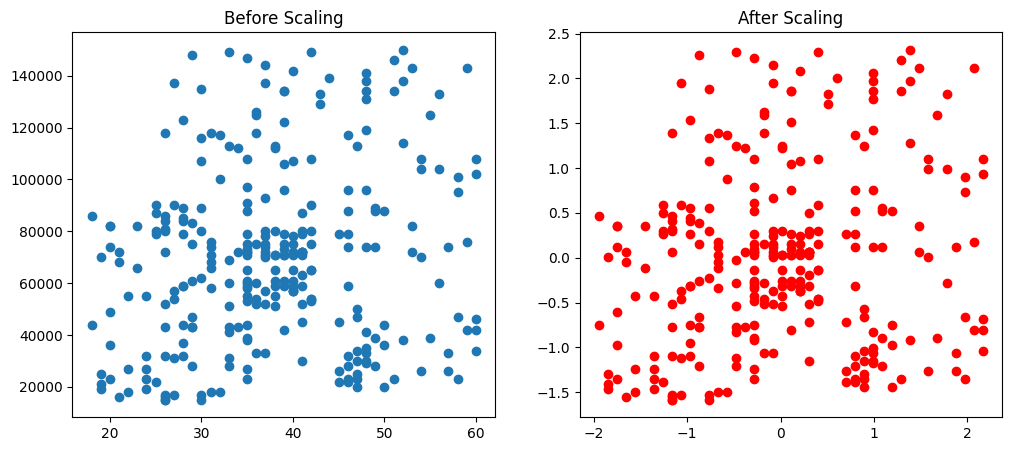

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='Red')
ax2.set_title('After Scaling')
plt.show()

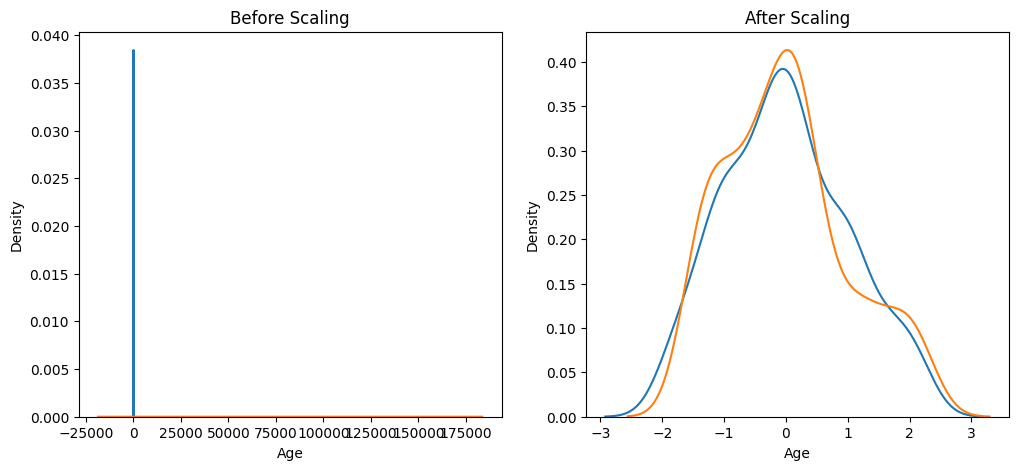

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

### 📌 Testing using algorithm

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [15]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [16]:
y_pred = lr.predict(X_test)
y_scaled_pred =  lr_scaled.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score

print("Actual : ", accuracy_score(Y_test, y_pred))
print("Scaled ; ", accuracy_score(Y_test, y_scaled_pred))

Actual :  0.6583333333333333
Scaled ;  0.8666666666666667
